# Bintang Putra Sadewa
### 2209106110

## Import Library dan baca Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset drug200.csv
df = pd.read_csv('drug200.csv')

## Preprocessing Data

1. **Label Encoding:**
   Dataset mengandung beberapa fitur kategorikal seperti `Sex`, `BP`, dan `Cholesterol`. Agar model Machine Learning dapat memahami data tersebut, kita perlu mengubah data kategorikal menjadi numerik. Oleh karena itu, kita menggunakan `LabelEncoder` dari `sklearn.preprocessing` untuk mengonversi:
   
   - `Sex`: Mengonversi kategori "M" (Male) dan "F" (Female) menjadi nilai numerik (0 dan 1).
   - `BP`: Mengonversi kategori tekanan darah seperti "LOW", "NORMAL", dan "HIGH" menjadi nilai numerik.
   - `Cholesterol`: Mengonversi tingkat kolesterol "NORMAL" dan "HIGH" menjadi nilai numerik.

2. **Pemisahan Fitur dan Target:**
   - **Fitur (X)**: Semua kolom kecuali kolom `Drug`, yaitu kolom `Age`, `Sex`, `BP`, `Cholesterol`, dan `Na_to_K`.
   - **Target (y)**: Kolom `Drug`, yang merupakan label atau klasifikasi obat yang akan diprediksi oleh model.

3. **Split Dataset:**
   - Dataset dipecah menjadi dua bagian: 80% data digunakan untuk melatih model (`train set`) dan 20% sisanya digunakan untuk menguji model (`test set`).

In [2]:
# Preprocessing
le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])
df['BP'] = le_bp.fit_transform(df['BP'])
df['Cholesterol'] = le_cholesterol.fit_transform(df['Cholesterol'])

# Fitur dan target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementasi Support Vector Classifier (SVC)

**Membuat Model SVC:**
   - Model **Support Vector Classifier** digunakan untuk melakukan klasifikasi dengan menggunakan algoritma Support Vector Machine (SVM).
   - **Kernel Linear** dipilih untuk SVC, yang berarti bahwa model akan mencoba memisahkan data ke dalam kelas-kelas menggunakan garis linear. Kernel linear cocok ketika data cukup terpisah dengan jelas.
   - **fit()**: Model SVC dilatih menggunakan dataset training (`X_train` dan `y_train`) agar model mampu mempelajari pola yang terdapat dalam data.



In [3]:
# Implementasi Support Vector Classifier (SVC)
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluasi: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix - SVM")
print(cm)

Confusion Matrix - SVM
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


In [4]:
# Evaluasi: Classification Report
print("Classification Report - SVM")
print(classification_report(y_test, y_pred_svc))

Classification Report - SVM
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Regresi

1. **`y_test_reg`**: Array `[3, -0.5, 2, 7]` merepresentasikan nilai target yang sebenarnya (atau dikenal sebagai nilai "ground truth").
   
2. **`y_pred_reg`**: Array `[2.5, 0.0, 2, 8]` adalah prediksi model untuk nilai-nilai target tersebut.

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Contoh data regresi
y_test_reg = np.array([3, -0.5, 2, 7])
y_pred_reg = np.array([2.5, 0.0, 2, 8])

# Evaluasi
print("MAE :", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE :", mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE :", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R-Squared :", r2_score(y_test_reg, y_pred_reg))

MAE : 0.5
MSE : 0.375
RMSE : 0.6123724356957945
R-Squared : 0.9486081370449679


## Confusion Matrix

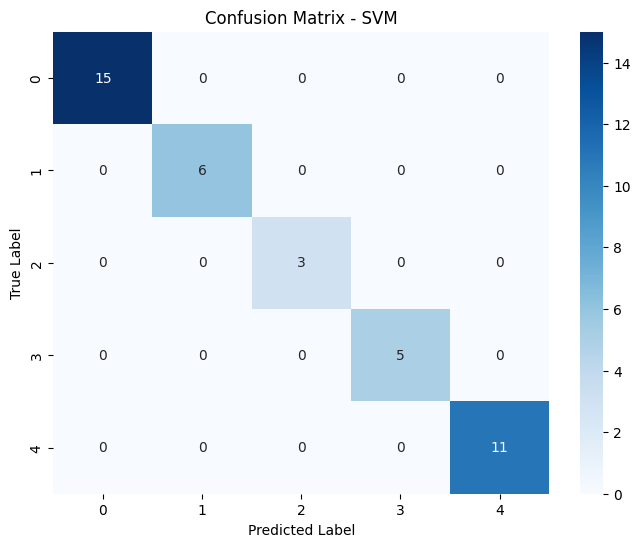

In [6]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title("Confusion Matrix - SVM")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Scatter

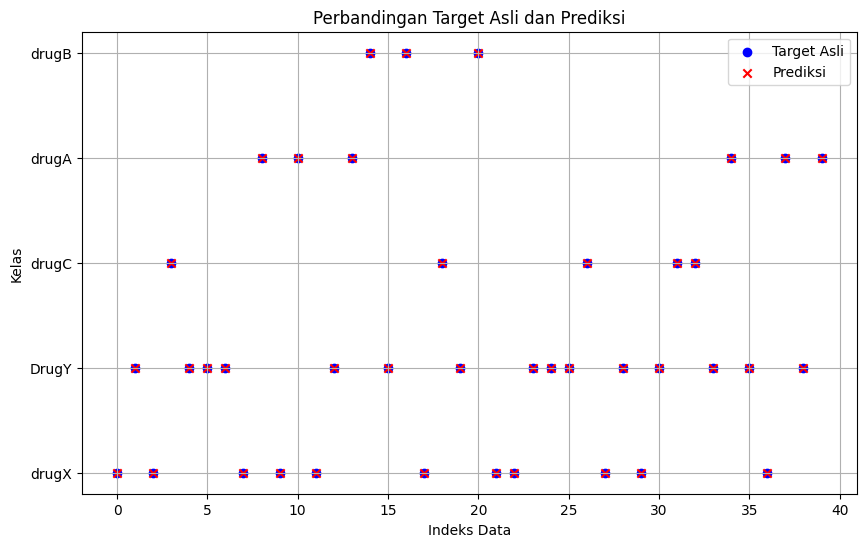

In [7]:
# Membuat bar plot distribusi kelas
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Target Asli')
plt.scatter(range(len(y_pred_svc)), y_pred_svc, color='red', marker='x', label='Prediksi')
plt.title("Perbandingan Target Asli dan Prediksi")
plt.xlabel("Indeks Data")
plt.ylabel("Kelas")
plt.legend()
plt.grid(True)
plt.show()